In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [199]:
datasets=pd.read_csv('Salary_Data.csv')

In [200]:
X = datasets.iloc[:, :-1].values
Y = datasets.iloc[:, 1].values

In [188]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1/3,random_state=0)

In [189]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [201]:
Y_pred=regressor.predict(X_test)

In [203]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_Test,Y_pred)

1405591120.5235124

Text(0, 0.5, 'Salary')

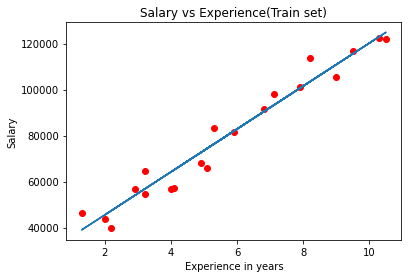

In [85]:
plt.scatter(X_Train,Y_Train,color='red')
plt.plot(X_Train,regressor.predict(X_Train),)
plt.title('Salary vs Experience(Train set)')
plt.xlabel('Experience in years')
plt.ylabel('Salary')


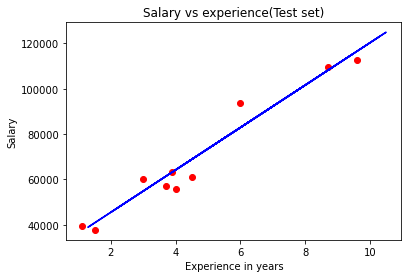

In [86]:
plt.scatter(X_Test,Y_Test,color='red')
plt.plot(X_Train,regressor.predict(X_Train),color='blue')
plt.title('Salary vs experience(Test set)')
plt.xlabel('Experience in years')
plt.ylabel('Salary')
plt.show()

QUESTION 2

In [126]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

In [206]:
dataset = pd.read_csv('Iris.csv')
x = dataset.iloc[:,[1,2,3,4]]
y = dataset.iloc[:,-1]
print(x.shape, y.shape)

(150, 4) (150,)


In [208]:
print(dataset["Species"].value_counts())


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


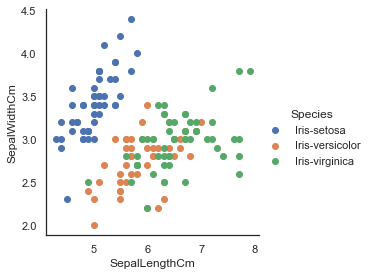

In [209]:
sns.FacetGrid(dataset, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()

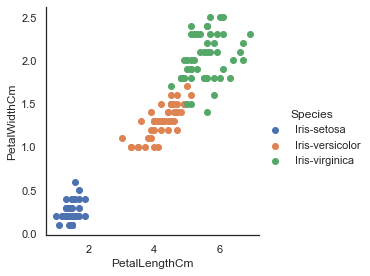

In [210]:
sns.FacetGrid(dataset, hue="Species", size=4).map(plt.scatter, "PetalLengthCm", "PetalWidthCm").add_legend()
plt.show()

In [211]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)

In [212]:
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(x)

KMeans(n_clusters=3)

In [213]:
y_cluster_kmeans = km.predict(x)
from sklearn import metrics
score = metrics.silhouette_score(x, y_cluster_kmeans)
print(score)

0.5525919445499757


In [215]:
dataset.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [216]:
data_new = dataset.copy()                                 
data_new = data_new.fillna(data_new.mean())            
print(data_new)                                        

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [217]:
print(data_new.shape)
data_new = data_new[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
data_new = data_new.dropna(axis=0)

(150, 6)


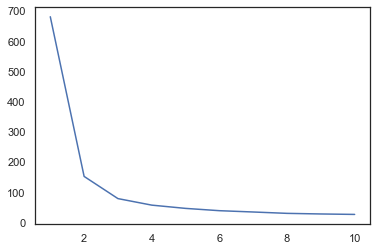

In [218]:
wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(data_new)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);

In [219]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target


In [220]:
km = KMeans(n_clusters=4, random_state=42)

In [221]:
km.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 3, 3, 3, 1, 3, 1,
       3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1])

In [222]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X, km.labels_, metric='euclidean')

In [223]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.498


Question 3

In [224]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [225]:
scaler = preprocessing.StandardScaler()
scaler.fit(x)
X_scaled_array = scaler.transform(x)
X_scaled = pd.DataFrame(X_scaled_array, columns = x.columns)


In [226]:
from sklearn.cluster import KMeans
nclusters = 4 
km = KMeans(n_clusters=nclusters)
km.fit(X_scaled)


KMeans(n_clusters=4)

In [227]:
y_scaled_cluster_kmeans = km.predict(X_scaled)
from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_scaled_cluster_kmeans)
print('Silhouette score after applying scaling:',score)

Silhouette score after applying scaling: 0.3858522519958861


The silhouette plots can be used to select the most optimal value of the K (no. of cluster) in K-means clustering.The Silhouette score in feature scaling is near to 0, while the Silhouette score in K-means clustering is near to 1 when compared with feature scaling. Hence it does not improve Silhouette score. 